## Reinforcement Learning on 4x4 Small GridWorld

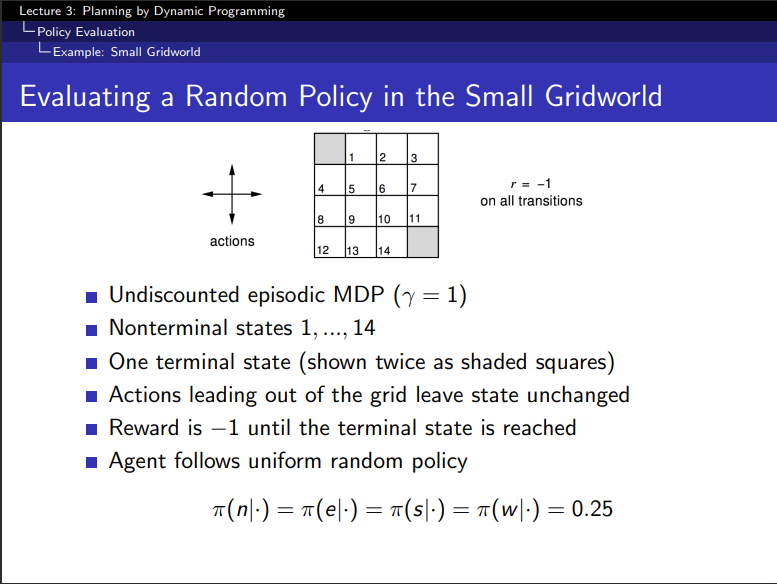

In [1]:
library(ReinforcementLearning)

In [9]:
#states <- c("s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16")
states <- as.character(1:16)
actions <- c("up", "down", "left", "right")
rewards <- rep(-1, 16)

In [49]:
env <- function(state, action) {
    state <- as.numeric(state)
    next_state <- state
    if (action == "up")
        next_state <- state - 4
    if (action == "down")
        next_state <- state + 4
    if (action == "left")
        next_state <- state - 1
    if (action == "right")
        next_state <- state + 1
    if ((next_state == 16 && state != 16) || (next_state == 1 && state !=1)){ 
        reward <- 10
    }
    else {
        reward <- -1
    }
    out <- list(NextState = as.character(next_state), Reward = reward)
    return(out)
}


In [58]:
# Here is the environment consist of 14 non terminal state (2-15) and 2 terminal state (1 and 16)

# | 1    2   3   4|
# | 5    6   7   8|
# | 9   10  11  12|
# |13   14  15  16|

In [50]:
# Sample N = 1000 random sequences from the environment
data <- sampleExperience(N = 1000, 
                         env = env, 
                         states = states, 
                         actions = actions)
head(data)

,State,Action,Reward,NextState
,<chr>,<chr>,<dbl>,<chr>
1,8,left,-1,7
2,5,left,-1,4
3,7,up,-1,3
4,3,down,-1,7
5,6,left,-1,5
6,11,left,-1,10


In [51]:
# Define reinforcement learning parameters
control <- list(alpha = 0.1, gamma = 0.5, epsilon = 0.1)

# Perform reinforcement learning
model <- ReinforcementLearning(data, 
                               s = "State", 
                               a = "Action", 
                               r = "Reward", 
                               s_new = "NextState", 
                               control = control)

In [52]:
# Print policy
computePolicy(model)

1      10       2      11      12       3       4      13      14       5 
"right" "right"  "left"  "down"  "down"  "left" "right"  "left" "right"    "up" 
     15       6      16       7       8       9 
"right"    "up"  "left"  "down"  "down"    "up"

In [53]:
# Print state-action function
print(model)

State-Action function Q
        right         up       down       left
1   1.2980864 -0.9282102  1.1275459 -0.9202336
10 -0.4000152 -0.5168156 -0.4865334 -0.6342365
2  -0.5253365 -0.8146980 -0.5439065  7.0570712
11  1.0036804 -1.0817150  1.7981748 -0.9085026
12 -0.7664874 -0.4764696  7.5102456 -0.5796595
3  -0.5344601 -0.8499054 -1.0645285  1.1335730
4   1.2563536 -0.7941089 -0.5676832 -0.5511685
13 -0.5544636 -0.7575225 -0.8146980  0.3612390
14  1.9032505 -0.9468770 -0.7941089 -0.7043687
5  -0.6484298  6.6964804 -0.6175843 -0.6908240
15  8.4773178 -0.4583982 -0.7458134 -0.5143655
6  -1.0213281  1.5047529 -0.9963821  0.9413866
16 -0.8146980  0.9172655 -0.8649148  2.0665479
7  -0.6220207 -0.6514615 -0.5145258 -0.6638116
8  -0.6942242 -0.6069737  1.1517510 -0.9807244
9  -0.8806852  1.0418001 -0.7510918 -0.5844532

Policy
      1      10       2      11      12       3       4      13      14       5 
"right" "right"  "left"  "down"  "down"  "left" "right"  "left" "right"    "up" 
     15

In [54]:
# Print summary statistics
summary(model)


Model details
Learning rule:           experienceReplay
Learning iterations:     1
Number of states:        16
Number of actions:       4
Total Reward:            -461

Reward details (per iteration)
Min:                     -461
Max:                     -461
Average:                 -461
Median:                  -461
Standard deviation:      NA


In [55]:
# Example data
data_unseen <- data.frame(State = c("2", "15", "12"), 
                          stringsAsFactors = FALSE)

# Pick optimal action
data_unseen$OptimalAction <- predict(model, data_unseen$State)

data_unseen

State,OptimalAction
<chr>,<chr>
2,left
15,right
12,down


In [56]:
# Sample N = 1000 sequences from the environment
# using epsilon-greedy action selection
data_new <- sampleExperience(N = 1000, 
                             env = env, 
                             states = states, 
                             actions = actions, 
                             actionSelection = "epsilon-greedy",
                             model = model, 
                             control = control)

# Update the existing policy using new training data
model_new <- ReinforcementLearning(data_new, 
                                   s = "State", 
                                   a = "Action", 
                                   r = "Reward", 
                                   s_new = "NextState", 
                                   control = control,
                                   model = model,
                                   iter = 5)

In [57]:
# Print result
print(model_new)

State-Action function Q
        right         up       down       left
1   5.3333327 -0.9576088  2.6959829 -0.9721872
10  1.6666653  0.8150636  1.4910977 -0.6342365
2   0.2251573 -0.9618480  0.7987079 12.6666660
11  5.1237275 -1.0817150  5.3333321 -0.9085026
12  0.1828342  1.1664110 12.6666657 -0.5796595
3   0.3320390 -0.9690968 -0.7118305  5.3333326
4   5.3333322 -0.7941089  0.8272147  1.3674194
13  0.2727645  1.2780203 -0.9774716  5.3333321
14  5.3333318 -0.4747248 -0.9576088  1.1221166
5   0.8370018 12.6666652  0.2919709  0.2535221
15 12.6666658  0.3414126 -0.8499054 -0.5143655
6  -0.2533923  5.3333326 -0.9963821  0.9413866
16 -0.9353892  4.3921470 -0.8649148  5.3333325
7   0.8061950  1.1209700  1.6666655 -0.6638116
8   0.1484714  0.2171104  5.3333324 -0.6946580
9  -0.6116517  5.3333319  0.7795242 -0.5844532

Policy
      1      10       2      11      12       3       4      13      14       5 
"right" "right"  "left"  "down"  "down"  "left" "right"  "left" "right"    "up" 
     15

In [48]:
# Here is the environment consist of 14 non terminal state (2-15) and 2 terminal state (1 and 16)

# | 1    2   3   4|
# | 5    6   7   8|
# | 9   10  11  12|
# |13   14  15  16|

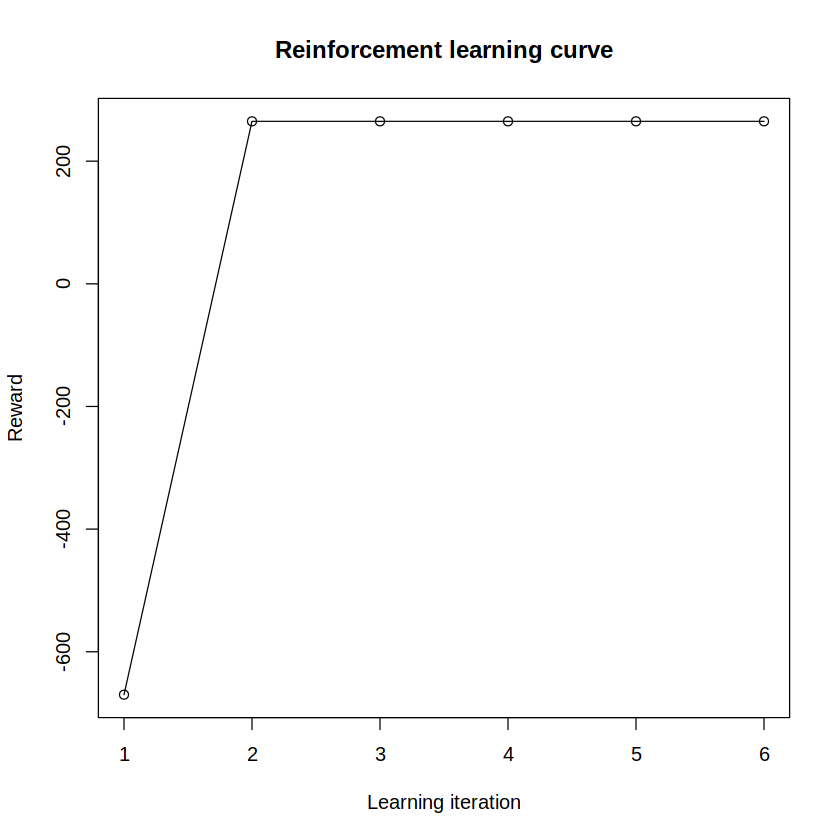

In [47]:
# Plot reinforcement learning curve
plot(model_new)

## 17. Reinforcement Learning Case Example in IT Consultant Company

IT Consultant Company relies on IT project as major income. Resource allocation is a key decision-making process in project management that assign resources to activities of a project and determines the timing of the allocation in a cost and time effective manner. To avoid project risk such as delay, overbudget, and additional penalty, Reinforcement Learning may able to seek the best resource allocation policy.

#### <b>Case Description</b>
<b>Agent</b> : Project manager or project management representative that having task to assign resource to the project \
<b>Action</b> : Assign additional resource or not assign additional resource \
<b>States</b> : Assume project has 5 activities to finish (1,2,3,4,5) \
<b>Reward</b> : Maximum time on task - actual time taken \
<b>State Transition</b> : When start, it is certain that activitiy 1 can be completed. When transitioning from activities 1, it is likely continued to activities 2, but also possible to goes to activity 4. From activity 2, it is likely proceed to activity 4 but also possible to goes to activity 3. From activity 3, it is certain that next activity will be activity 2. From activity 4, it is more likely goes to activity 5 and less likely goes to activity 3. From activity 5, it unsure whether it can goes to activity 3 nor finishing the project. 

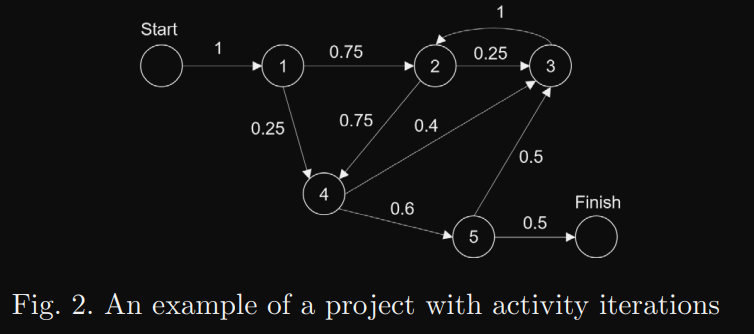


Source: https://www.sciencedirect.com/science/article/pii/S2405896320335588